In [54]:
# load data
import pandas as pd

df = pd.read_csv('data/synop/aggregated_data.csv')
df

,Date,Max_Daily_Temperature,Min_Daily_Temperature,Avg_Daily_Temperature,Total_Daily_Precipitation,Sunshine_Hours,Actinometry,Wind_Duration_Over_10m_s,Avg_Daily_Overall_Cloudiness,Avg_Daily_Wind_Speed,CarbonIntensityDirect,CarbonIntensityLCA,LowCarbonPercentage,RenewablePercentage
0,2021-01-01,3.5,-8.6,-1.468000,0.372000,0.892,0.0,0.668,6.200000,2.375,847.59,943.28,9.54,8.03
1,2021-01-02,7.3,-9.7,-0.164000,0.784000,0.396,0.0,1.160,5.638889,2.752,836.02,930.38,11.44,9.57
2,2021-01-03,6.2,-6.6,0.388000,2.441667,0.096,0.0,1.232,5.393750,3.480,721.29,807.28,22.67,20.41
3,2021-01-04,7.0,-7.3,0.828000,2.700000,0.324,0.0,0.152,4.150000,2.772,804.27,894.23,15.20,13.73
4,2021-01-05,5.5,-6.6,0.972000,6.248000,0.000,0.0,1.376,3.385714,4.012,783.85,870.12,17.89,16.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,8.6,-9.2,2.424000,0.268000,3.644,0.0,1.236,1.232000,5.132,628.36,701.88,37.99,37.32
1091,2023-12-28,11.0,-4.6,4.056000,0.096000,2.372,0.0,1.788,1.436000,4.728,537.74,603.71,46.89,46.76
1092,2023-12-29,11.1,-2.8,6.291667,1.808000,1.640,0.0,1.808,1.420833,5.188,519.19,583.15,48.77,48.69
1093,2023-12-30,10.9,-4.9,5.104000,1.908000,0.824,0.0,1.672,1.660000,5.000,580.92,650.71,42.28,41.78


In [55]:
# select columns

## print all column names
print(df.columns)

## select columns

df = df[['Date', 'Max_Daily_Temperature', 'Min_Daily_Temperature',
       'Avg_Daily_Temperature', 'Total_Daily_Precipitation', 'Sunshine_Hours',
       'Actinometry', 'Wind_Duration_Over_10m_s',
       'Avg_Daily_Overall_Cloudiness', 'Avg_Daily_Wind_Speed',
       'RenewablePercentage']]

df


Index(['Date', 'Max_Daily_Temperature', 'Min_Daily_Temperature',
       'Avg_Daily_Temperature', 'Total_Daily_Precipitation', 'Sunshine_Hours',
       'Actinometry', 'Wind_Duration_Over_10m_s',
       'Avg_Daily_Overall_Cloudiness', 'Avg_Daily_Wind_Speed',
       'CarbonIntensityDirect', 'CarbonIntensityLCA', 'LowCarbonPercentage',
       'RenewablePercentage'],
      dtype='object')


,Date,Max_Daily_Temperature,Min_Daily_Temperature,Avg_Daily_Temperature,Total_Daily_Precipitation,Sunshine_Hours,Actinometry,Wind_Duration_Over_10m_s,Avg_Daily_Overall_Cloudiness,Avg_Daily_Wind_Speed,RenewablePercentage
0,2021-01-01,3.5,-8.6,-1.468000,0.372000,0.892,0.0,0.668,6.200000,2.375,8.03
1,2021-01-02,7.3,-9.7,-0.164000,0.784000,0.396,0.0,1.160,5.638889,2.752,9.57
2,2021-01-03,6.2,-6.6,0.388000,2.441667,0.096,0.0,1.232,5.393750,3.480,20.41
3,2021-01-04,7.0,-7.3,0.828000,2.700000,0.324,0.0,0.152,4.150000,2.772,13.73
4,2021-01-05,5.5,-6.6,0.972000,6.248000,0.000,0.0,1.376,3.385714,4.012,16.82
...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,8.6,-9.2,2.424000,0.268000,3.644,0.0,1.236,1.232000,5.132,37.32
1091,2023-12-28,11.0,-4.6,4.056000,0.096000,2.372,0.0,1.788,1.436000,4.728,46.76
1092,2023-12-29,11.1,-2.8,6.291667,1.808000,1.640,0.0,1.808,1.420833,5.188,48.69
1093,2023-12-30,10.9,-4.9,5.104000,1.908000,0.824,0.0,1.672,1.660000,5.000,41.78


## Model Preparation
Split the data into training and testing sets, select the target variable, and decide on the predictor variables.

In [56]:
from sklearn.model_selection import train_test_split

# Define predictors and target
X = df.drop(['Date', 'RenewablePercentage'], axis=1)
y = df['RenewablePercentage']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## RandomForests

### Model Building
Select and train a model that fits your hypothesis or prediction goals.

In [57]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error (MAE): 4.13
Mean Squared Error (MSE): 27.19
Root Mean Squared Error (RMSE): 5.21
R-squared: 0.67


### Feature Importance

In [59]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                              importance
Avg_Daily_Wind_Speed            0.429314
Avg_Daily_Overall_Cloudiness    0.228266
Max_Daily_Temperature           0.091953
Sunshine_Hours                  0.091924
Avg_Daily_Temperature           0.075962
Total_Daily_Precipitation       0.030387
Wind_Duration_Over_10m_s        0.027232
Min_Daily_Temperature           0.024964
Actinometry                     0.000000


In [60]:
# plot feature importances
import plotly.express as px

fig = px.line(feature_importances, x=feature_importances.index, y='importance', title='Feature Importances')
fig.show()

### Visualizing Predictions
Sometimes, visualizing the predictions against the actual values can provide a clearer picture of where the model is performing well and where it is not

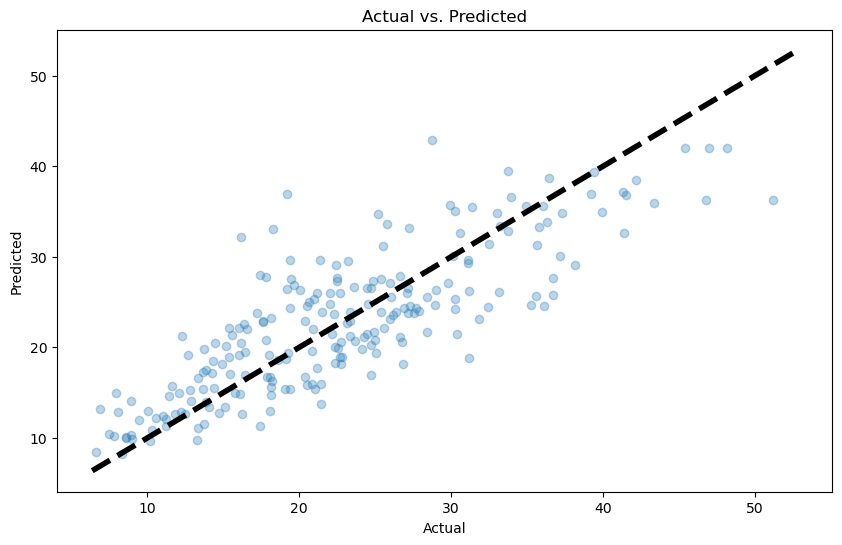

In [61]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


Based on the updated evaluation metrics, feature importance, and the scatter plot of Actual vs. Predicted values, here is an analysis of the model's performance:

## Evaluation Metrics
- **MAE of 4.13** and **RMSE of 5.21**: These values indicate a moderate level of error in the predictions, with an average deviation of around 4-5 units from the actual values.
- **R-squared of 0.67**: This score suggests that the model explains about 67% of the variance in the target variable, which is a reasonable but not exceptional level of predictive power.

## Feature Importance
- **`Avg_Daily_Wind_Speed`** emerges as the most important predictor, accounting for nearly 43% of the importance. This aligns with expectations, as wind speed is a critical factor for wind energy production.
- **`Avg_Daily_Overall_Cloudiness`** (22.8% importance) and **`Max_Daily_Temperature`** (9.2% importance) also play significant roles, likely due to their impact on solar energy production.
- **`Actinometry`** shows zero importance, suggesting that this variable does not contribute to predicting the target variable in the current model.

## Scatter Plot Analysis
- The scatter plot shows a generally positive correlation between the actual and predicted values, with most points clustering around the dashed line representing the ideal prediction.
- However, there is a noticeable spread of points around the line, indicating that the model's predictions deviate from the actual values to a moderate degree, consistent with the evaluation metrics.
- No obvious patterns or biases are visible in the spread of points, suggesting that the errors are randomly distributed.

While the model demonstrates reasonable predictive performance, there is room for improvement. Potential next steps could include:

1. **Feature Engineering**: Exploring additional relevant features, such as time-based variables or interactions between features, could capture more complex dynamics and improve predictive power.

2. **Model Tuning**: Experimenting with different algorithms or parameter settings for the current model (e.g., RandomForestRegressor) might yield better results.

3. **Cross-Validation**: Implementing cross-validation techniques would ensure robust performance across different subsets of the data.

4. **Deeper Analysis of Feature Importance**: Given the high importance of wind speed, investigating models that can capture non-linear relationships or feature interactions could be beneficial.

5. **Data Collection**: Gathering more data, particularly for variables that show potential importance, could enhance the accuracy and robustness of the model.

By addressing these areas, the forecasting model's performance could be further improved, making it more reliable and valuable for decision-making or predictive analytics in renewable energy contexts.


## Generalized Function for Plotting Actual vs. Predicted

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import List

def plot_actual_vs_forecast(df: pd.DataFrame, actual_col: str, forecast: List[float], forecast_period: int, title: str, freq: str = 'D', plot_size: tuple = (19, 12)):
    """
    Plots actual vs. forecasted values.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing the actual values.
    - actual_col (str): Column name of the actual values in the DataFrame.
    - forecast (List[float]): Forecasted values as a list.
    - forecast_period (int): Number of forecasted periods.
    - title (str): Title for the plot.
    - freq (str): Frequency of the forecast periods (default 'D' for daily).
    - plot_size (tuple): Size of the plot in inches (width, height).
    """
    # Set index to datetime if not already
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)

    # Create forecast dates starting from the last date in the actual data
    forecast_dates = pd.date_range(df.index[-1], periods=forecast_period + 1, freq=freq)[1:]

    # Plot actual and forecasted values
    plt.figure(figsize=plot_size)
    plt.plot(df.index, df[actual_col], label='Actual', alpha=0.7)
    plt.plot(forecast_dates, forecast, label='Forecast', linestyle='dashed', color='orange')
    plt.legend()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(actual_col)
    plt.grid(True)

    # Adjust x-axis ticks to avoid overlap
    plt.xticks(df.index[::max(1, len(df.index) // 14)], rotation=45, ha='right')
    
    # change theme to five thirty eight
    plt.style.use('fivethirtyeight')

    # Show plot
    plt.show()


## Metrics Calculation and Model Evaluation Code

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
import matplotlib.pyplot as plt
from typing import List

# Ex post error metrics function
def evaluate_forecast(actuals, forecast):
    mae = mean_absolute_error(actuals, forecast)
    mse = mean_squared_error(actuals, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actuals - forecast) / actuals)) * 100
    r2 = r2_score(actuals, forecast)
    rmse_forecast_ratio = rmse / np.mean(forecast)
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%, R²: {r2:.2f}, RMSE/Forecast: {rmse_forecast_ratio:.2f}")
    return mae, mse, rmse, mape, r2, rmse_forecast_ratio


## ARIMA

/home/gr00stl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



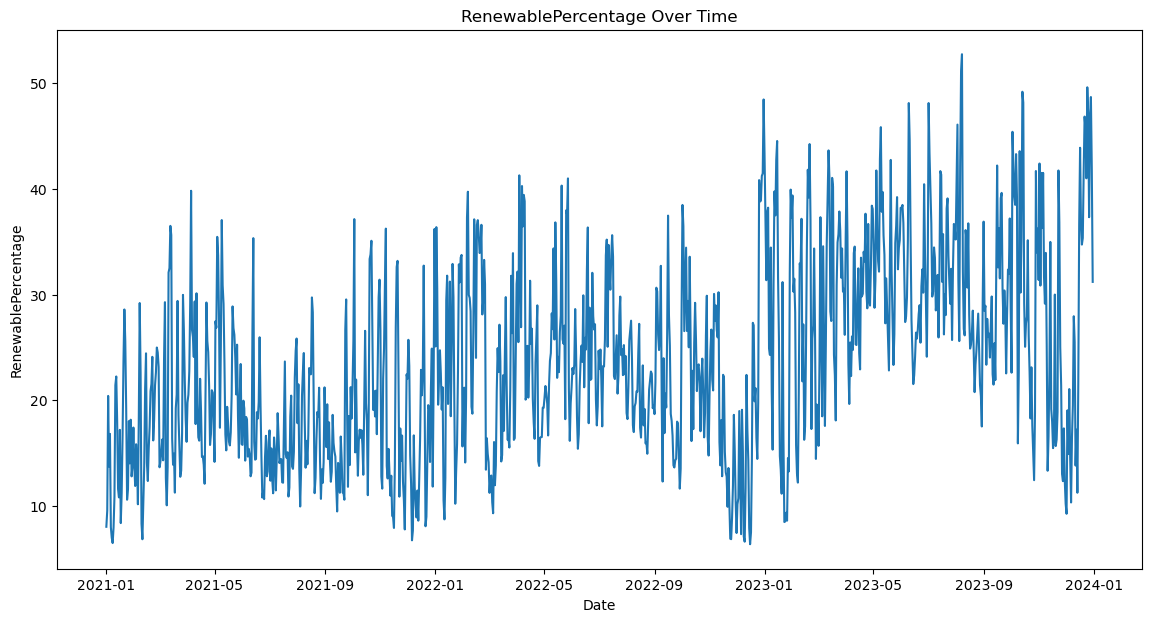

ADF p-value: 5.712522054884187e-07


/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/t

Best ARIMA order: (2, 2) with AIC: 7026.04441812044


/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



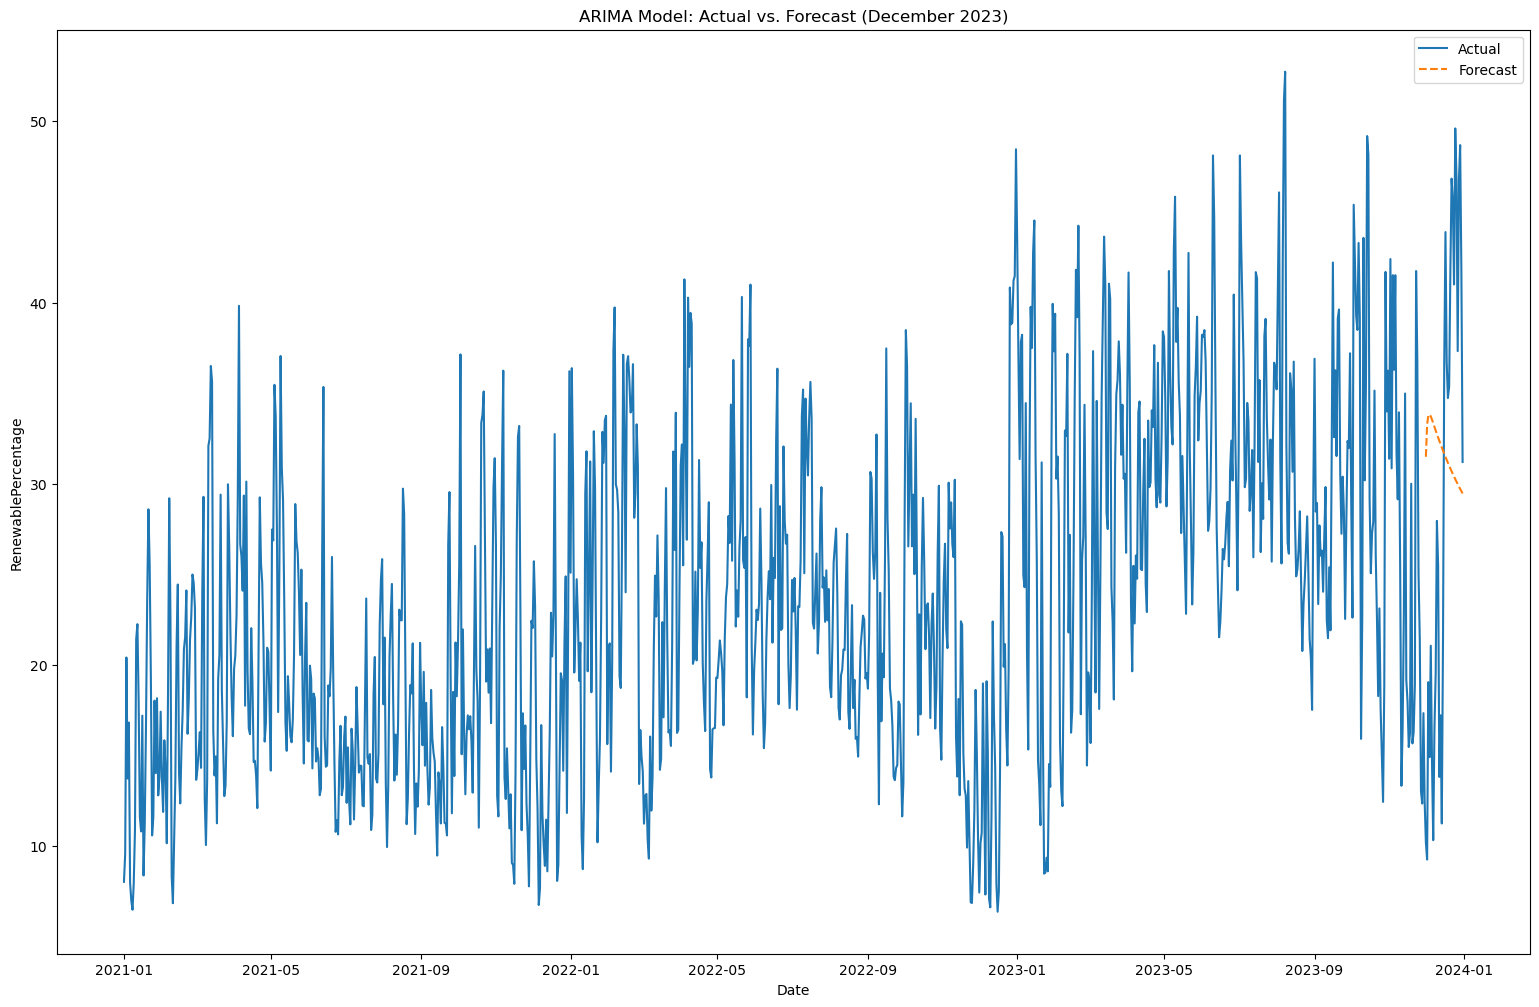

In [76]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

def plot_actual_vs_forecast(df, actual_col, forecast, forecast_dates, title, plot_size=(10, 6)):
    plt.figure(figsize=plot_size)
    plt.plot(df.index, df[actual_col], label='Actual')
    plt.plot(forecast_dates, forecast, label='Forecast', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(actual_col)
    plt.title(title)
    plt.legend()
    plt.show()

def adf_test(series):
    """Perform Augmented Dickey-Fuller test to check for stationarity."""
    result = adfuller(series.dropna())
    return result[1]  # Return p-value

# Load your data
df = pd.read_csv('data/synop/aggregated_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for non-numeric values in RenewablePercentage and convert to numeric
df['RenewablePercentage'] = pd.to_numeric(df['RenewablePercentage'], errors='coerce')

# Handle missing values by filling them with the mean (or use another strategy if preferred)
df['RenewablePercentage'].fillna(df['RenewablePercentage'].mean(), inplace=True)

# Plot the data to inspect its variability
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='RenewablePercentage')
plt.title('RenewablePercentage Over Time')
plt.show()

# Check for stationarity
p_value = adf_test(df['RenewablePercentage'])
print(f'ADF p-value: {p_value}')

# If the series is not stationary, apply differencing
if p_value > 0.05:
    d = 1
else:
    d = 0

# Define the range of parameters to test
p = range(0, 4)
q = range(0, 4)
parameters = product(p, q)
parameters_list = list(parameters)

# Find the best ARIMA model parameters based on AIC
best_aic = float("inf")
best_order = None

for order in parameters_list:
    try:
        model = ARIMA(df['RenewablePercentage'], order=(order[0], d, order[1]))
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
    except Exception as e:
        continue

print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')

# Fit the best ARIMA model
arima_model = ARIMA(df['RenewablePercentage'], order=(best_order[0], d, best_order[1]))
arima_results = arima_model.fit()

# Forecasting
forecast_period = 31  # Forecast the month of December 2023
start_date = pd.Timestamp('2023-12-01')
end_date = pd.Timestamp('2023-12-31')
forecast_dates = pd.date_range(start=start_date, end=end_date)

# Generate forecast for the exact forecast_period days from the ARIMA model
arima_forecast = arima_results.forecast(steps=forecast_period)

# Plot actual vs forecast
plot_actual_vs_forecast(df, 'RenewablePercentage', arima_forecast.tolist(), forecast_dates, 'ARIMA Model: Actual vs. Forecast (December 2023)', plot_size=(19, 12))


In [77]:
# evaluate the forecast

evaluate_forecast(df['RenewablePercentage'][-forecast_period:], arima_forecast)

MAE: 13.44, MSE: 217.88, RMSE: 14.76, MAPE: nan%, R²: -0.20, RMSE/Forecast: 0.47


(13.443331769520416,
 217.88408043456107,
 14.7608970064343,
 nan,
 -0.19568134893134315,
 0.4665585147175051)

## ARIMA


/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



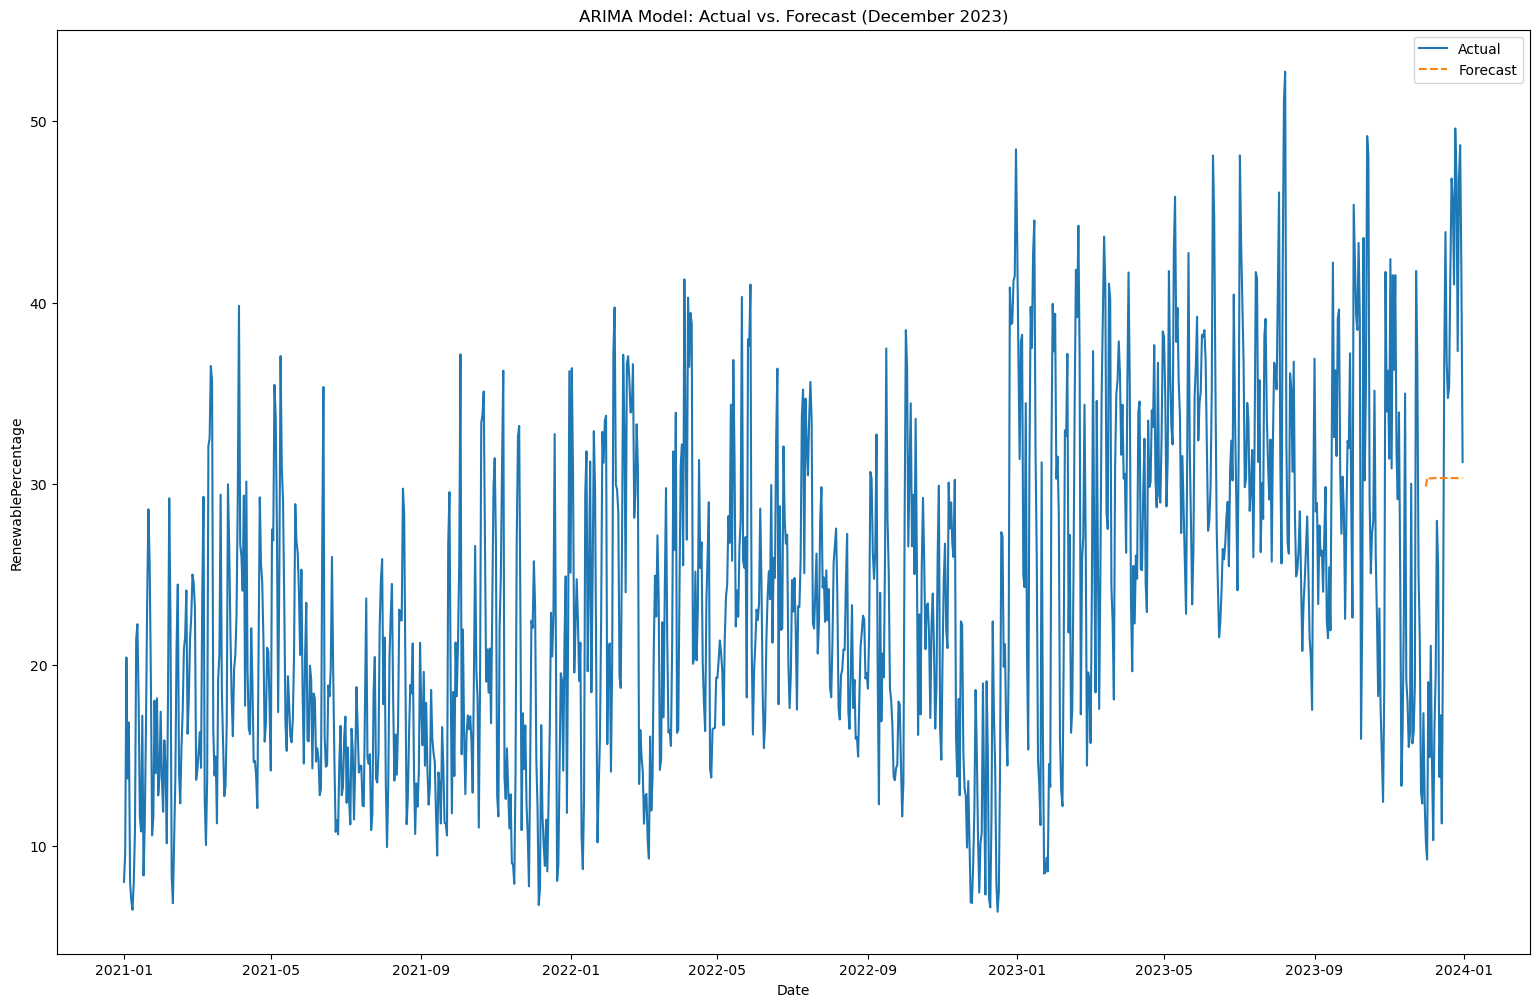

In [66]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv('data/synop/aggregated_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for non-numeric values in RenewablePercentage and convert to numeric
df['RenewablePercentage'] = pd.to_numeric(df['RenewablePercentage'], errors='coerce')

# Handle missing values by filling them with the mean (or use another strategy if preferred)
df['RenewablePercentage'].fillna(df['RenewablePercentage'].mean(), inplace=True)


# Fit an ARIMA model
# Try different orders (p, d, q)
order = (2, 1, 2)
arima_model = ARIMA(df['RenewablePercentage'], order=order)
arima_results = arima_model.fit()

# Forecasting
forecast_period = 31  # Forecast the month of December 2023
start_date = pd.Timestamp('2023-12-01')
end_date = pd.Timestamp('2023-12-31')
forecast_dates = pd.date_range(start=start_date, end=end_date)

# Generate forecast for the exact forecast_period days from the ARIMA model
arima_forecast = arima_results.forecast(steps=forecast_period)

# Plot actual vs forecast
plt.figure(figsize=(19, 12))
plt.plot(df.index, df['RenewablePercentage'], label='Actual')
plt.plot(forecast_dates, arima_forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('RenewablePercentage')
plt.title('ARIMA Model: Actual vs. Forecast (December 2023)')
plt.legend()
plt.show()


In [78]:
# evaluate the forecast
evaluate_forecast(df['RenewablePercentage'][-forecast_period:], arima_forecast)

MAE: 13.44, MSE: 217.88, RMSE: 14.76, MAPE: nan%, R²: -0.20, RMSE/Forecast: 0.47


(13.443331769520416,
 217.88408043456107,
 14.7608970064343,
 nan,
 -0.19568134893134315,
 0.4665585147175051)

### ARIMA evaluation

MAE: 12.30, MSE: 182.06, RMSE: 13.49, MAPE: nan%, R²: 0.00, RMSE/Forecast: 0.45


## SARIMAX (Time Series Model with Exogenous Variables)

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# Load your data
df = pd.read_csv('data/synop/aggregated_data.csv')
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
df

,Max_Daily_Temperature,Min_Daily_Temperature,Avg_Daily_Temperature,Total_Daily_Precipitation,Sunshine_Hours,Actinometry,Wind_Duration_Over_10m_s,Avg_Daily_Overall_Cloudiness,Avg_Daily_Wind_Speed,CarbonIntensityDirect,CarbonIntensityLCA,LowCarbonPercentage,RenewablePercentage
Date,,,,,,,,,,,,,
2021-01-01,3.5,-8.6,-1.468000,0.372000,0.892,0.0,0.668,6.200000,2.375,847.59,943.28,9.54,8.03
2021-01-02,7.3,-9.7,-0.164000,0.784000,0.396,0.0,1.160,5.638889,2.752,836.02,930.38,11.44,9.57
2021-01-03,6.2,-6.6,0.388000,2.441667,0.096,0.0,1.232,5.393750,3.480,721.29,807.28,22.67,20.41
2021-01-04,7.0,-7.3,0.828000,2.700000,0.324,0.0,0.152,4.150000,2.772,804.27,894.23,15.20,13.73
2021-01-05,5.5,-6.6,0.972000,6.248000,0.000,0.0,1.376,3.385714,4.012,783.85,870.12,17.89,16.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,8.6,-9.2,2.424000,0.268000,3.644,0.0,1.236,1.232000,5.132,628.36,701.88,37.99,37.32
2023-12-28,11.0,-4.6,4.056000,0.096000,2.372,0.0,1.788,1.436000,4.728,537.74,603.71,46.89,46.76
2023-12-29,11.1,-2.8,6.291667,1.808000,1.640,0.0,1.808,1.420833,5.188,519.19,583.15,48.77,48.69


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95910D+00    |proj g|=  2.73494D-01


/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  2.83374D+00    |proj g|=  9.69711D-02

At iterate   10    f=  2.82338D+00    |proj g|=  3.02166D-03

At iterate   15    f=  2.82330D+00    |proj g|=  1.52388D-03

At iterate   20    f=  2.82326D+00    |proj g|=  2.39584D-03

At iterate   25    f=  2.82311D+00    |proj g|=  1.64631D-03

At iterate   30    f=  2.82302D+00    |proj g|=  1.13412D-03

At iterate   35    f=  2.82301D+00    |proj g|=  5.17450D-04

At iterate   40    f=  2.82292D+00    |proj g|=  2.51816D-03

At iterate   45    f=  2.82240D+00    |proj g|=  1.20831D-02


/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  2.82207D+00    |proj g|=  1.68638D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     60      1     0     0   1.686D-03   2.822D+00
  F =   2.8220693685135845     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


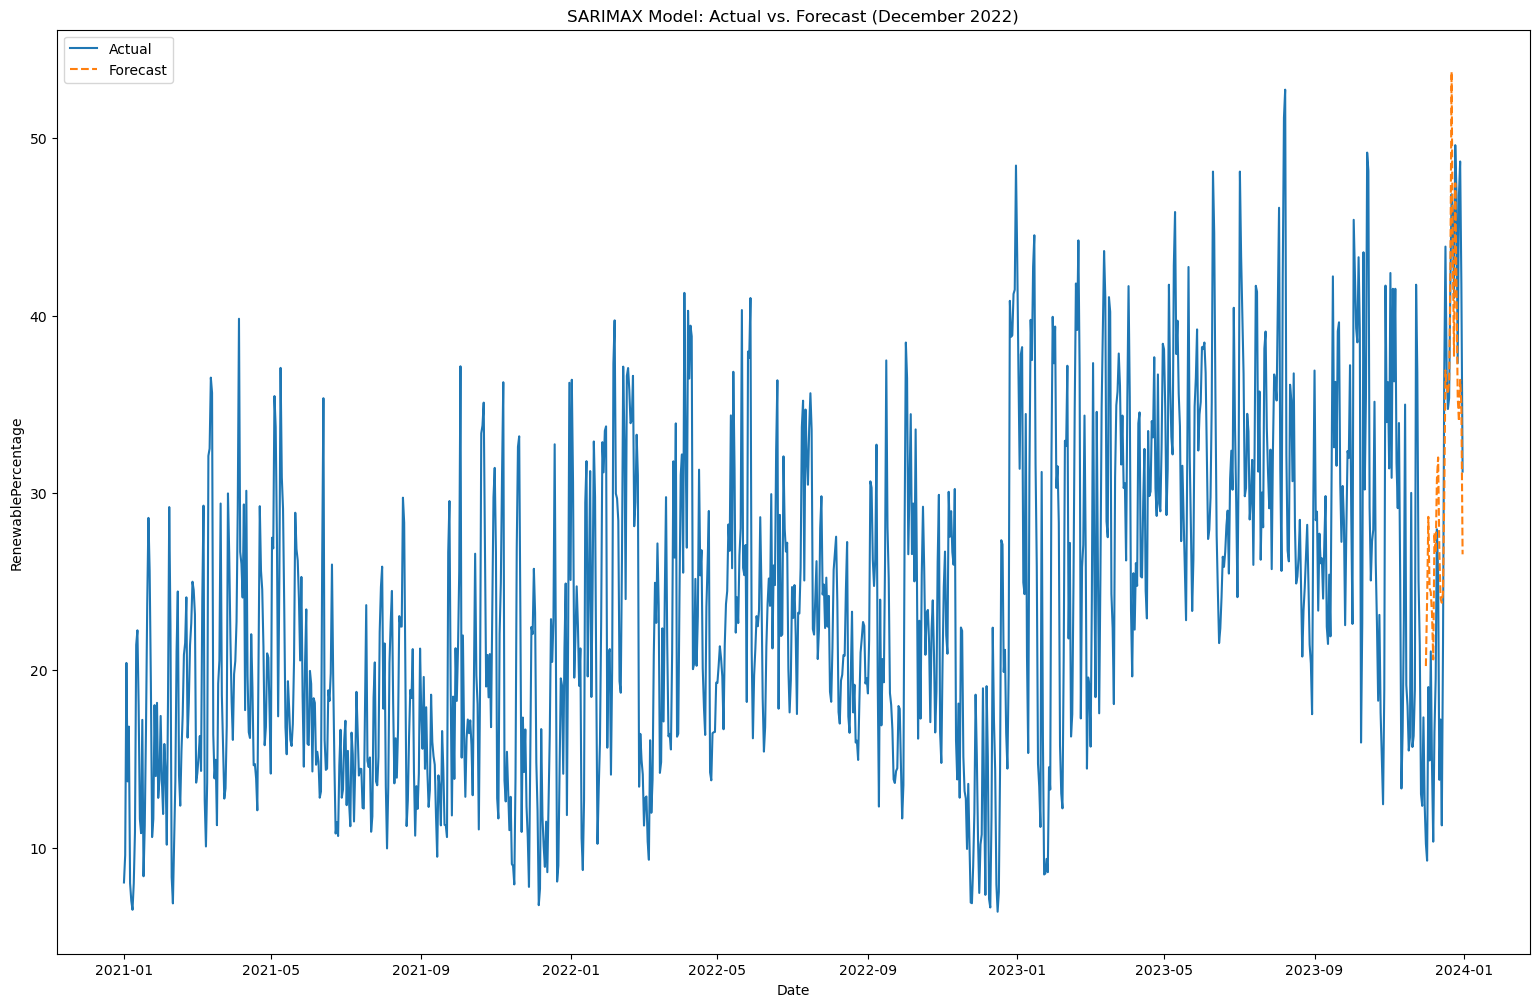

In [69]:

# Define the exogenous variables (e.g., weather data)
exog_vars = df[['Avg_Daily_Wind_Speed', 'Max_Daily_Temperature', 'Avg_Daily_Overall_Cloudiness']]

# Fit a SARIMAX model
sarimax_model = SARIMAX(df['RenewablePercentage'], exog=exog_vars, order=(2, 1, 2), seasonal_order=(1, 0, 1, 12))  # Adjust orders
sarimax_results = sarimax_model.fit()

# Forecasting with exogenous variables
forecast_period = 31  # Forecast the last month of 2022 (December)
forecast_exog = exog_vars.loc['2023-12-01':'2023-12-31'].drop_duplicates()  # Ensure exact exog data for December
sarimax_forecast = sarimax_results.forecast(steps=forecast_period, exog=forecast_exog)

# Create forecast dates for the last month of 2022
forecast_dates = pd.date_range('2023-12-01', '2023-12-31', freq='D')

# Call the generalized plotting function
plot_actual_vs_forecast(df, 'RenewablePercentage', sarimax_forecast.tolist(), forecast_dates, 'SARIMAX Model: Actual vs. Forecast (December 2022)', plot_size=(19, 12))


In [70]:
# Evaluate the forecast
evaluate_forecast(df['RenewablePercentage'][-forecast_period:], sarimax_forecast)


MAE: 6.59, MSE: 60.62, RMSE: 7.79, MAPE: nan%, R²: 0.67, RMSE/Forecast: 0.24


(6.588769484652879,
 60.62279780184849,
 7.786064333271881,
 nan,
 0.6673205839217957,
 0.24378349166720448)

### SARIMAX evaluation

#### with three exog variables

MAE: 6.59, MSE: 60.62, RMSE: 7.79, MAPE: nan%, R²: 0.67, RMSE/Forecast: 0.24

#### with five exog. variables

MAE: 6.71, MSE: 61.77, RMSE: 7.86, MAPE: nan%, R²: 0.66, RMSE/Forecast: 0.24

## VAR (Multivariate Time Series Model)

/home/gr00stl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



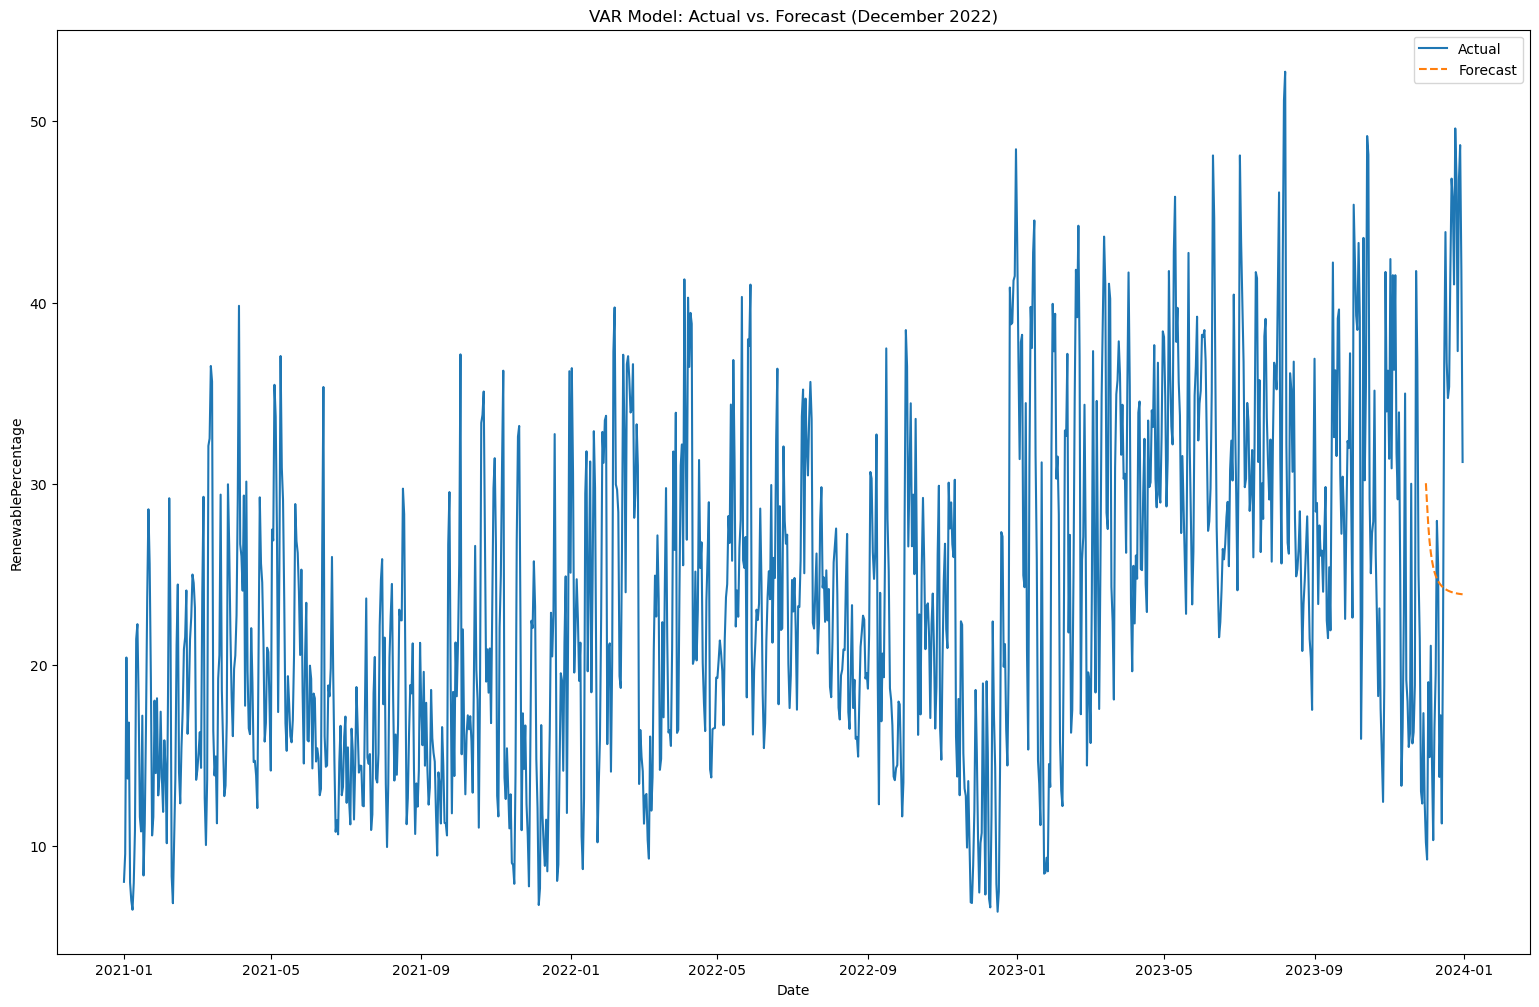

In [71]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Load your data
df = pd.read_csv('data/synop/aggregated_data.csv')
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

# Define multivariate data (including 'RenewablePercentage' and weather data)
var_data = df[['RenewablePercentage', 'Avg_Daily_Wind_Speed', 'Max_Daily_Temperature', 'Avg_Daily_Overall_Cloudiness']]

# Fit a VAR model
var_model = VAR(var_data)
var_results = var_model.fit(maxlags=2)

# Forecasting with VAR
forecast_period = 31  # Forecast the last month of 2022 (December)
var_forecast = var_results.forecast(var_data.values[-2:], steps=forecast_period)

# Convert forecast to DataFrame
var_forecast_df = pd.DataFrame(var_forecast, columns=['RenewablePercentage', 'Avg_Wind_Speed', 'Avg_Max_Temp', 'Avg_Cloudiness'])

# Create forecast dates for the last month of 2022
forecast_dates = pd.date_range('2023-12-01', '2023-12-31', freq='D')

# Call the generalized plotting function
plot_actual_vs_forecast(df, 'RenewablePercentage', var_forecast_df['RenewablePercentage'].tolist(), forecast_dates, 'VAR Model: Actual vs. Forecast (December 2022)', plot_size=(19, 12))


In [72]:

# VAR Evaluation
print("VAR Model Evaluation:")
evaluate_forecast(df['RenewablePercentage'][-forecast_period:], var_forecast_df['RenewablePercentage'])

VAR Model Evaluation:
MAE: 13.67, MSE: 233.38, RMSE: 15.28, MAPE: nan%, R²: -0.28, RMSE/Forecast: 0.61


/tmp/ipykernel_708137/3101796111.py:15: RuntimeWarning:

'<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.



(13.667652547616312,
 233.37674966232734,
 15.2766733833753,
 nan,
 -0.28070039026679416,
 0.6134498232986345)

### VAR Evaluation
MAE: 13.67, MSE: 233.38, RMSE: 15.28, MAPE: nan%, R²: -0.28, RMSE/Forecast: 0.61